In [1]:
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#read in data
data = pd.read_csv('dataset.csv', sep=',', index_col=0)

data.reset_index(inplace=True)

pre = 0;
for i in range(len(data.index)):
    if(data['Close Price'][i] > pre):
        data.loc[i, 'target'] = 1;
    else:
        data.loc[i, 'target'] = 0;
    pre = data['Close Price'][i];
    
data.set_index("Date" , inplace=True)

data.head(10)

,Open Price,Close Price,High Price,Low Price,Volume,target
Date,,,,,,
02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,1.0
05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,0.0
06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,1.0
07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,0.0
08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,1.0
09-Jan-2009,909.91,890.35,911.93,888.31,4716499968,0.0
12-Jan-2009,890.40,870.26,890.40,864.32,4725049856,0.0
13-Jan-2009,869.79,871.79,877.02,862.02,5017469952,1.0
14-Jan-2009,867.28,842.62,867.28,836.93,5407880192,0.0


In [3]:
#get training set
train = data[:'29-Dec-2017']
train.reset_index(inplace=True)
train = train.drop(['Date'], axis=1)

train.head()

,Open Price,Close Price,High Price,Low Price,Volume,target
0,902.99,931.80,934.73,899.35,4048270080,1.0
1,929.17,927.45,936.63,919.53,5413910016,0.0
2,931.17,934.70,943.85,927.28,5392620032,1.0
3,927.45,906.65,927.45,902.37,4704940032,0.0
4,905.73,909.73,910.00,896.81,4991549952,1.0


In [4]:
#get test set
test = data['02-Jan-2018':]
test.reset_index(inplace=True)
test = test.drop(['Date'], axis=1)

test.head()

,Open Price,Close Price,High Price,Low Price,Volume,target
0,2683.73,2695.81,2695.89,2682.36,1846463232,1.0
1,2697.85,2713.06,2714.37,2697.77,2090595328,1.0
2,2719.31,2723.99,2729.29,2719.07,2100767744,1.0
3,2731.33,2743.15,2743.45,2727.92,1918869120,1.0
4,2742.67,2747.71,2748.51,2737.60,1894823936,1.0


In [5]:
y_train = train['target']
y_test = test['target']

x_train = train.drop(['target'], axis=1)
x_test = test.drop(['target'], axis=1)

In [6]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [13]:
hidden_units = 10   # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [14]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=5,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [15]:
data['target'].value_counts()

1.0    1369
0.0    1147
Name: target, dtype: int64

In [16]:
class_weight = {
    0: 1.,
    1: 1147/1369
}

Epoch 1/10
2264/2264 [==============================] - ETA: 32s - loss: 0.6556 - acc: 0.40 - ETA: 0s - loss: 0.6338 - acc: 0.4954 - ETA: 0s - loss: 0.6327 - acc: 0.479 - 1s 260us/step - loss: 0.6324 - acc: 0.4863
Epoch 2/10
2264/2264 [==============================] - ETA: 0s - loss: 0.6337 - acc: 0.531 - ETA: 0s - loss: 0.6319 - acc: 0.549 - ETA: 0s - loss: 0.6325 - acc: 0.511 - 0s 57us/step - loss: 0.6324 - acc: 0.5057
Epoch 3/10
2264/2264 [==============================] - ETA: 0s - loss: 0.6335 - acc: 0.531 - ETA: 0s - loss: 0.6298 - acc: 0.562 - 0s 46us/step - loss: 0.6325 - acc: 0.5093
Epoch 4/10
2264/2264 [==============================] - ETA: 0s - loss: 0.6422 - acc: 0.562 - ETA: 0s - loss: 0.6331 - acc: 0.461 - 0s 44us/step - loss: 0.6321 - acc: 0.4713
Epoch 5/10
2264/2264 [==============================] - ETA: 0s - loss: 0.6209 - acc: 0.625 - ETA: 0s - loss: 0.6337 - acc: 0.532 - ETA: 0s - loss: 0.6320 - acc: 0.500 - 0s 48us/step - loss: 0.6320 - acc: 0.5013
Epoch 6/10
226

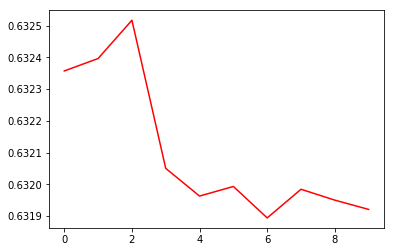

In [17]:
# train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [18]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight=class_weight, 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [19]:
_, test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:29<00:00,  1.47s/it]


Avgerage Training Accuracy: 0.532464664432059
Avgerage Testing Accuracy: 0.516666667494509


In [20]:
print('Min: %s' % np.min(test_accs))
print('Max: %s' % np.max(test_accs))

Min: 0.47619047902879263
Max: 0.5238095242825765
